In [93]:
import numpy as np
import pandas as pd

# Set up GL quad
gl_nodes = {
    1: [0],
    2: [-1.0/np.sqrt(3.0), 1.0/np.sqrt(3.0)],
    3: [-np.sqrt(5/8), 0, np.sqrt(5/8)],
    4: [-0.861136311594052575224, -0.3399810435848562648027, 0.3399810435848562648027, 0.861136311594052575224],
    5: [-0.9061798459386639927976, -0.5384693101056830910363, 0,
        0.5384693101056830910363, 0.9061798459386639927976],
    6: [-0.9324695142031520278123, -0.661209386466264513661, -0.2386191860831969086305,
        0.238619186083196908631, 0.661209386466264513661, 0.9324695142031520278123],
    7: [-0.9491079123427585245262, -0.7415311855993944398639, -0.4058451513773971669066,
        0, 0.4058451513773971669066, 0.7415311855993944398639, 0.9491079123427585245262],
    8: [-0.9602898564975362316836, -0.7966664774136267395916, -0.5255324099163289858177, -0.1834346424956498049395,
        0.1834346424956498049395, 0.5255324099163289858177, 0.7966664774136267395916, 0.9602898564975362316836],
    9: [-0.9681602395076260898356, -0.8360311073266357942994, -0.6133714327005903973087,
        -0.3242534234038089290385, 0, 0.3242534234038089290385,
        0.6133714327005903973087, 0.8360311073266357942994, 0.9681602395076260898356],
    10: [-0.973906528517171720078, -0.8650633666889845107321, -0.6794095682990244062343,
        -0.4333953941292471907993, -0.1488743389816312108848, 0.1488743389816312108848, 0.4333953941292471907993,
        0.6794095682990244062343, 0.8650633666889845107321, 0.973906528517171720078]
}

gl_weights = {
    1: [2],
    2: [1, 1,],
    3: [5/9, 8/9, 5/9],
    4: [0.3478548451374538573731, 0.6521451548625461426269, 0.6521451548625461426269, 0.3478548451374538573731],
    5: [0.2369268850561890875143, 0.4786286704993664680413, 0.5688888888888888888889,
        0.4786286704993664680413, 0.2369268850561890875143],
    6: [0.1713244923791703450403, 0.3607615730481386075698, 0.4679139345726910473899,
        0.46791393457269104739, 0.3607615730481386075698, 0.1713244923791703450403],
    7: [0.1294849661688696932706, 0.2797053914892766679015, 0.38183005050511894495,
        0.417959183673469387755, 0.38183005050511894495, 0.279705391489276667901, 0.129484966168869693271],
    8: [0.1012285362903762591525, 0.2223810344533744705444, 0.313706645877887287338, 0.3626837833783619829652,
        0.3626837833783619829652, 0.313706645877887287338, 0.222381034453374470544, 0.1012285362903762591525],
    9: [0.0812743883615744119719, 0.1806481606948574040585, 0.2606106964029354623187,
        0.312347077040002840069, 0.330239355001259763165, 0.312347077040002840069,
        0.260610696402935462319, 0.1806481606948574040585, 0.081274388361574411972],
    10: [0.0666713443086881375936, 0.149451349150580593146, 0.219086362515982043996,
        0.2692667193099963550912, 0.2955242247147528701739, 0.295524224714752870174, 0.269266719309996355091,
        0.2190863625159820439955, 0.1494513491505805931458, 0.0666713443086881375936]
}

import matplotlib.pyplot as plt

def plot_this(order, elements, lim):
    # Set up quad
    nodes = gl_nodes.get(order, "nothing")
    weights = gl_weights.get(order, "nothing")

    # build grid
    low, high = -np.pi, np.pi
    length = high - low
    dx = length / elements
    nodes_iso = (np.array(nodes) + 1) / 2
    # element left boundaries (including ghost elements)
    xl = np.linspace(low, high-dx, num=elements)
    # construct coordinates
    grid = np.zeros((elements, order))
    for i in range(elements):
        grid[i, :] = xl[i] + dx * np.array(nodes_iso)

    # A function
    f = np.sin(grid)

    # Wavenumbers
    k0 = 2.0 * np.pi / length
    waves = k0 * np.arange(1-lim, lim)
    transform_array = np.array([[[weights[j] * np.exp(-1j * waves[k] * grid[m, j])
                                                      for j in range(order)]
                                for m in range(elements)]
                                for k in range(waves.shape[0])]) / (2.0 * elements)

    # spectrum
    cp = np.tensordot(f, transform_array, axes=([0,1], [1, 2]))

    import matplotlib.pyplot as plt

    plt.figure()
    plt.plot(grid.flatten(), f.flatten(), 'o')
    plt.grid(True)

    plt.figure()
    plt.plot(waves / k0, np.absolute(cp), 'o--')
    plt.ylabel('|c|')
    plt.xlabel('mode number')
    plt.grid(True)
    plt.show()

## At order=1, this is the DFT
### Note symmetric aliasing around the grid scale
### This is due to cylic symmetry of the DFT... responsible for its exact inverse

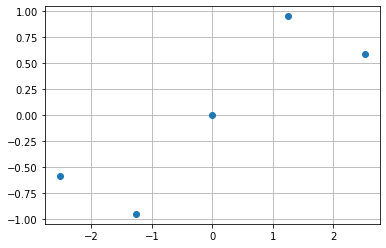

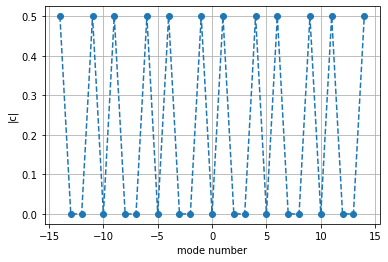

In [94]:
# plot for various parameters
plot_this(order=1, elements=5, lim=15)

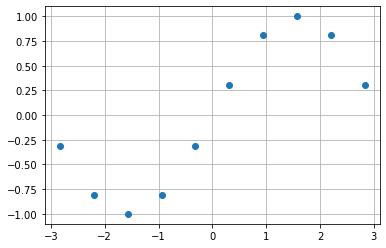

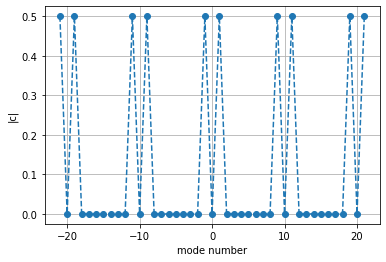

In [95]:
plot_this(order=1, elements=10, lim=22) 

### Higher-order quadrature produces an asymmetric aliasing

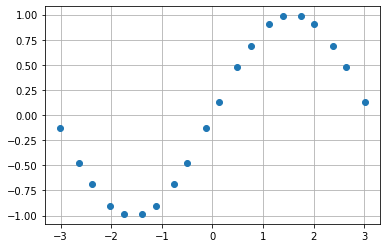

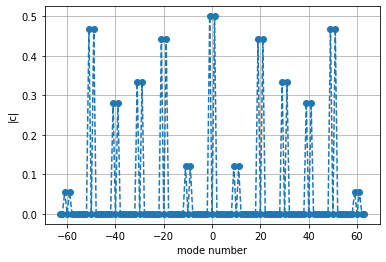

In [97]:
plot_this(order=2, elements=10, lim=64)

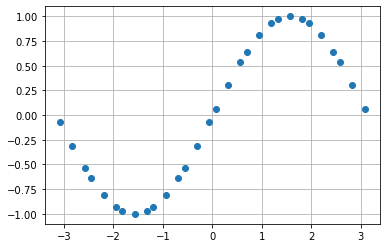

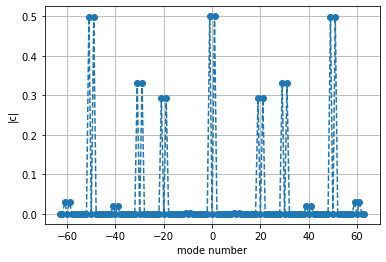

In [98]:
plot_this(order=3, elements=10, lim=64)

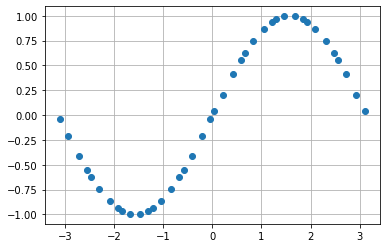

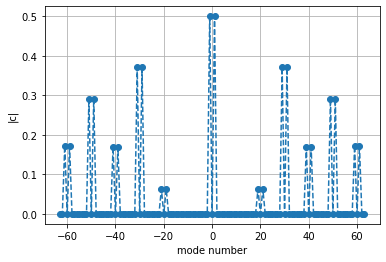

In [100]:
plot_this(order=4, elements=10, lim=64)

### The Nyquist frequency doubles at approximately 3rd-4th order

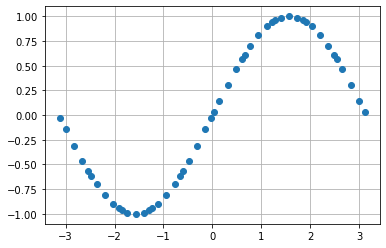

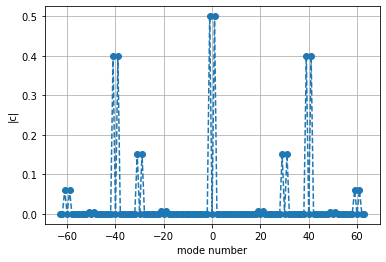

In [101]:
plot_this(order=5, elements=10, lim=64)

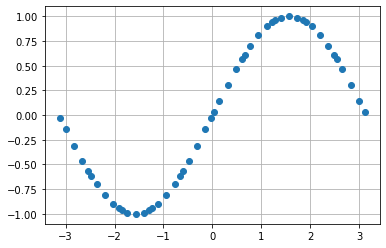

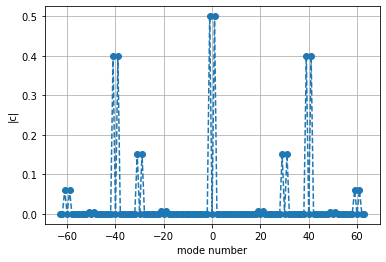

In [102]:
plot_this(order=5, elements=10, lim=64)

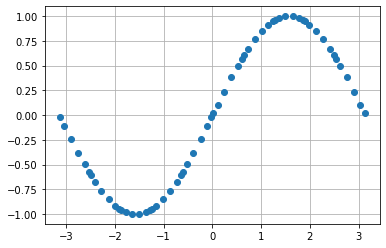

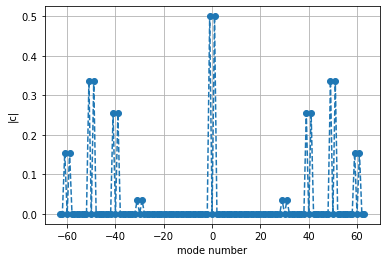

In [103]:
plot_this(order=6, elements=10, lim=64)

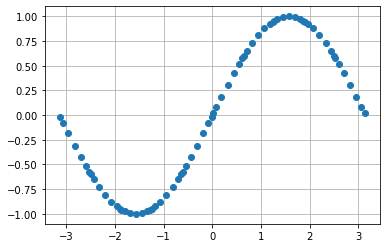

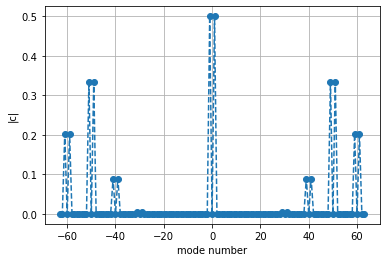

In [104]:
plot_this(order=7, elements=10, lim=64)

### Further, it triples at around 8th order

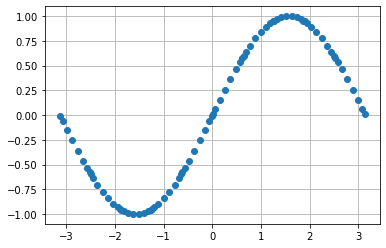

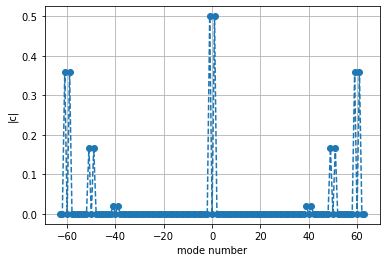

In [105]:
plot_this(order=8, elements=10, lim=64)

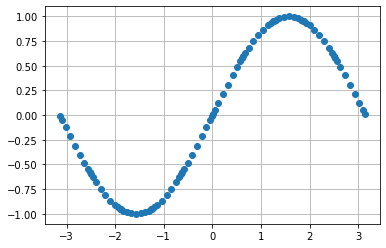

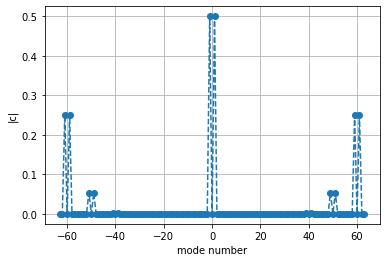

In [106]:
plot_this(order=9, elements=10, lim=64)

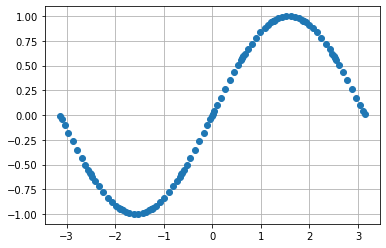

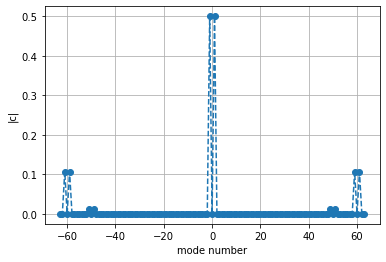

In [107]:
plot_this(order=10, elements=10, lim=64)

### Sufficient resolution is needed
#### With fewer elements (here, five), the same effect occurs (doubling at n=3) but with poorer resolution ofc

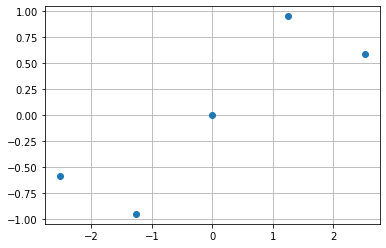

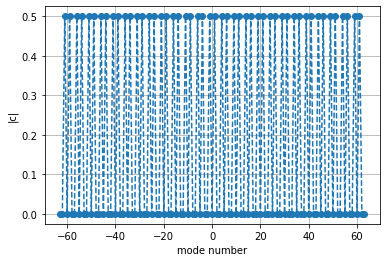

In [109]:
plot_this(order=1, elements=5, lim=64)

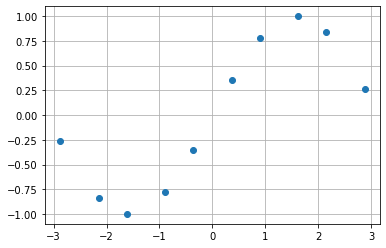

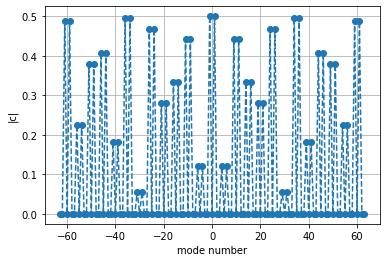

In [110]:
plot_this(order=2, elements=5, lim=64)

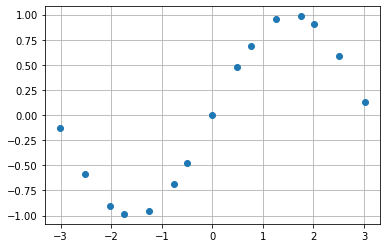

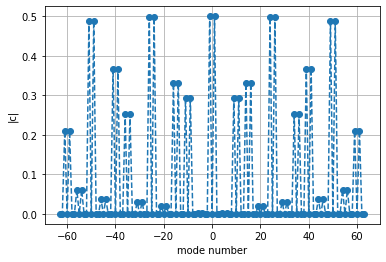

In [112]:
plot_this(order=3, elements=5, lim=64)

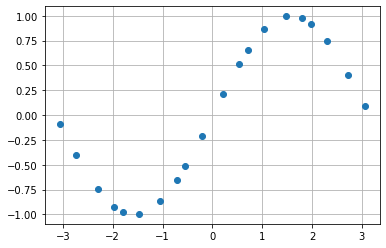

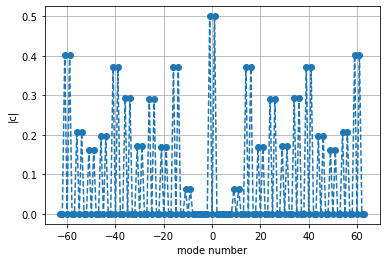

In [113]:
plot_this(order=4, elements=5, lim=64)

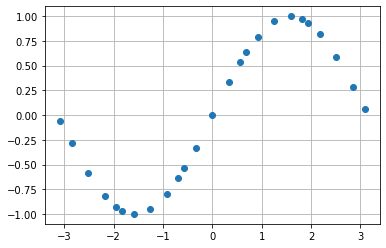

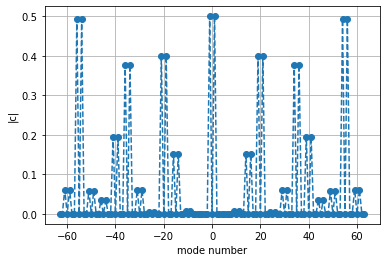

In [114]:
plot_this(order=5, elements=5, lim=64)

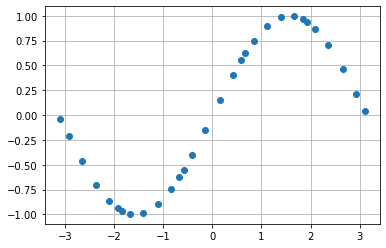

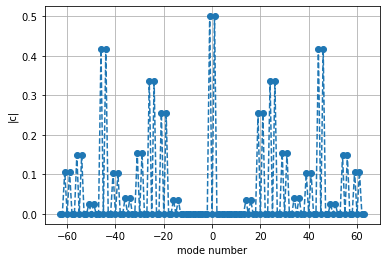

In [115]:
plot_this(order=6, elements=5, lim=64)

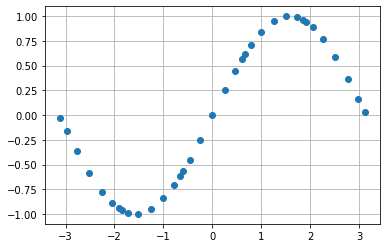

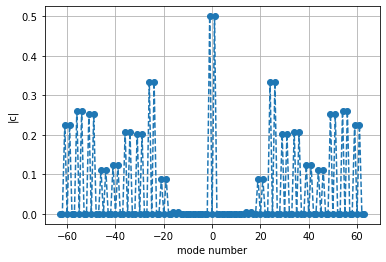

In [116]:
plot_this(order=7, elements=5, lim=64)

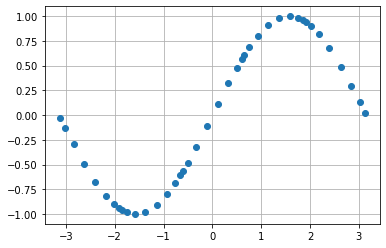

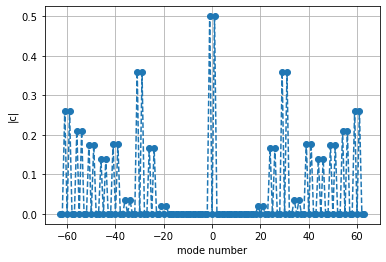

In [117]:
plot_this(order=8, elements=5, lim=64)

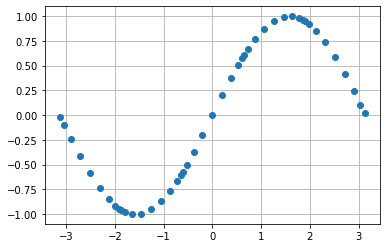

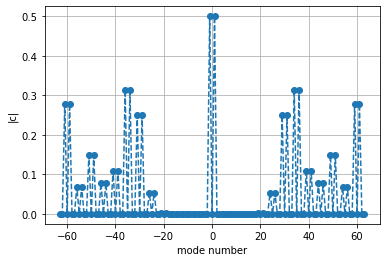

In [118]:
plot_this(order=9, elements=5, lim=64)

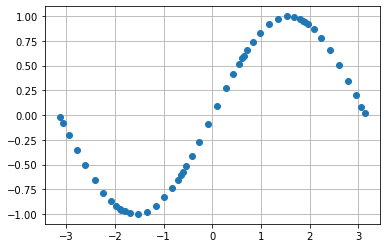

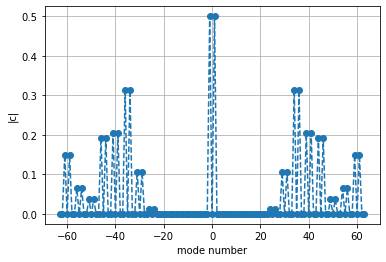

In [119]:
plot_this(order=10, elements=5, lim=64)

### Finally, single element results

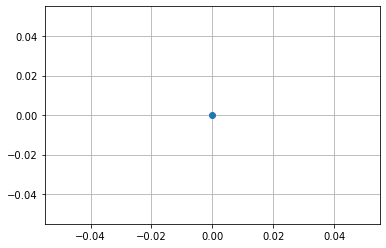

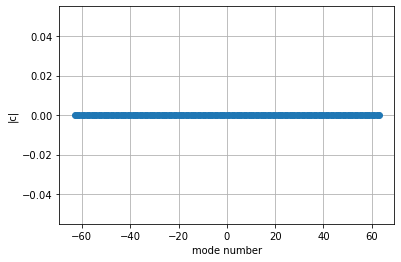

In [121]:
plot_this(order=1, elements=1, lim=64)

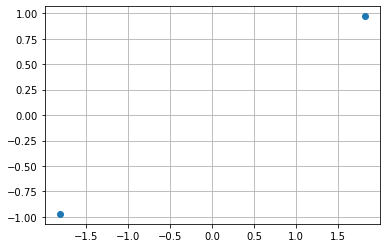

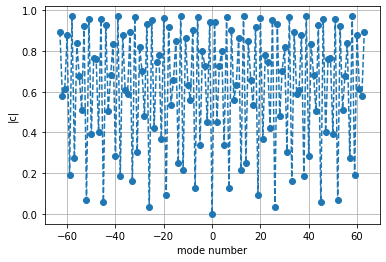

In [122]:
plot_this(order=2, elements=1, lim=64)

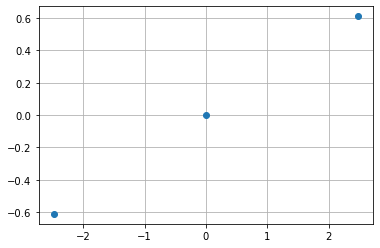

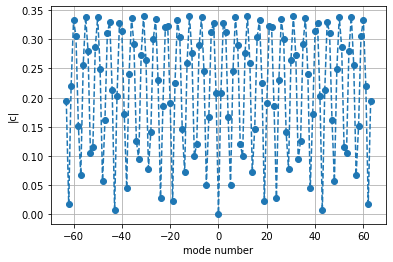

In [123]:
plot_this(order=3, elements=1, lim=64)

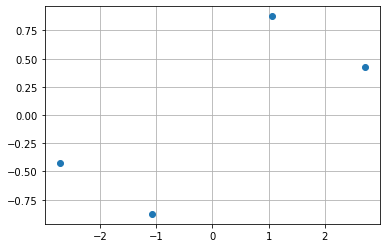

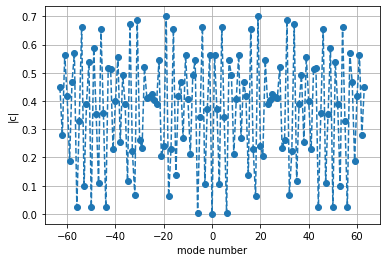

In [124]:
plot_this(order=4, elements=1, lim=64)

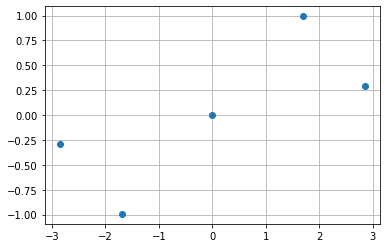

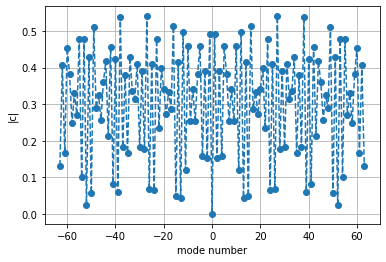

In [125]:
plot_this(order=5, elements=1, lim=64)

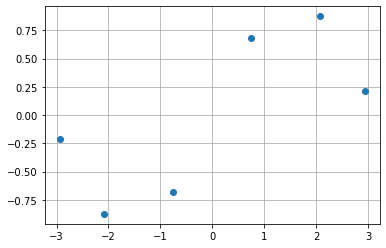

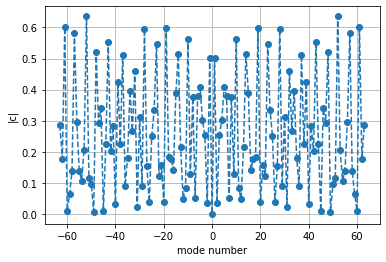

In [126]:
plot_this(order=6, elements=1, lim=64)

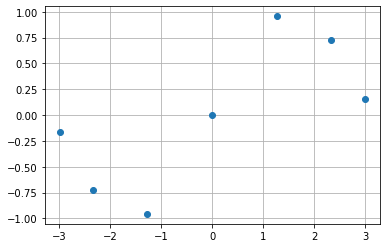

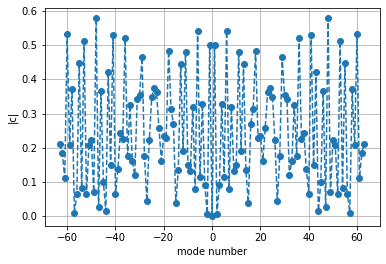

In [127]:
plot_this(order=7, elements=1, lim=64)

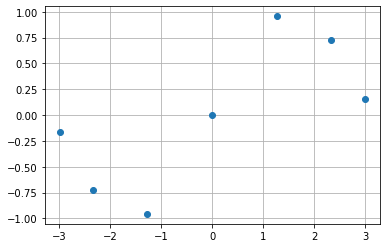

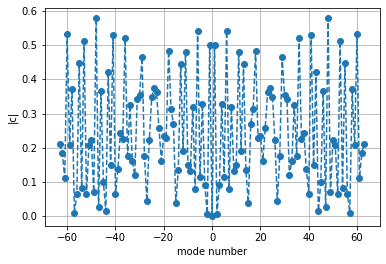

In [128]:
plot_this(order=7, elements=1, lim=64)

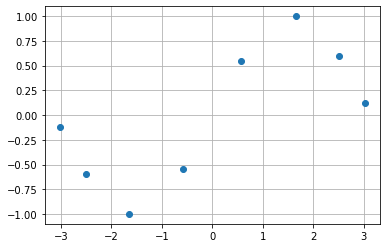

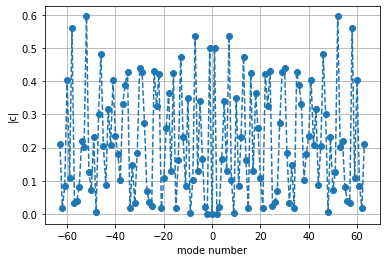

In [129]:
plot_this(order=8, elements=1, lim=64)

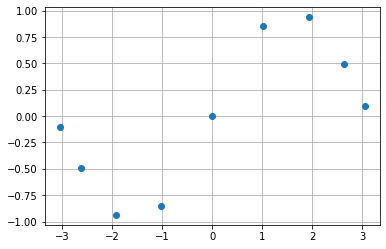

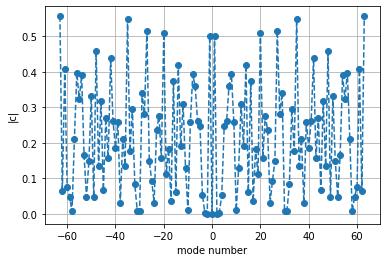

In [130]:
plot_this(order=9, elements=1, lim=64)

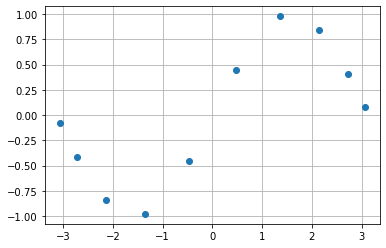

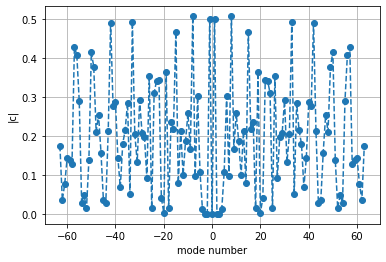

In [131]:
plot_this(order=10, elements=1, lim=64)